In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('df4.csv', encoding='ISO-8859-1')
df.head()

,cleaned_text,sentiment
0,what said,neutral
1,plus youve added commercials to the experience...,positive
2,i didnt today must mean i need to take another...,neutral
3,its really aggressive to blast obnoxious enter...,NaN
4,and its a really big bad thing about it,negative


In [3]:
X = df["cleaned_text"]
y = df["sentiment"]

In [4]:
y[y.isna()] = -1

In [5]:
X.fillna("",inplace=True)

In [6]:
y.isna().sum()

0

In [7]:
y = y.map({
    -1:-1,
    "negative":0,
    "neutral": 1,
    "positive": 2
})

In [8]:
X_labeled = X[y != -1]
y_labeled = y[y != -1]

X_unlabeled = X[y == -1]
y_unlabeled = y[y == -1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_labeled,y_labeled,test_size=0.2)
X_train = pd.concat([X_train,X_unlabeled])
y_train = pd.concat([y_train,y_unlabeled])

# Applying Label propagation with "rbf"

In [10]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("model",LabelPropagation(kernel="rbf"))
])

In [11]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LabelPropagation())])

In [12]:
y_pred = model.predict(X_test)

In [13]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.6737429985393689


In [14]:
print(accuracy_score(y_test,y_pred))

0.6750142287990893


In [15]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1103
           1       0.40      0.38      0.39       352
           2       0.59      0.61      0.60       302

    accuracy                           0.68      1757
   macro avg       0.59      0.59      0.59      1757
weighted avg       0.67      0.68      0.67      1757



## Applying Label propagation using "rbf"with Over-sampling using SMOTE

In [16]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("smote", SMOTE()),
    ("model",LabelPropagation(kernel="rbf"))
])

In [17]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE()),
                ('model', LabelPropagation())])

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.43760970748752376


In [20]:
print(accuracy_score(y_test,y_pred))

0.44678429140580533


In [21]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.26      0.41      1103
           1       0.28      0.74      0.41       352
           2       0.46      0.77      0.58       302

    accuracy                           0.45      1757
   macro avg       0.55      0.59      0.46      1757
weighted avg       0.70      0.45      0.44      1757



# Applying Label propagation with "knn"

In [22]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("model",LabelPropagation(kernel="knn"))
])

In [23]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LabelPropagation(kernel='knn'))])

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.7094707627335884


In [26]:
print(accuracy_score(y_test,y_pred))

0.71371656232214


In [27]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1103
           1       0.48      0.43      0.45       352
           2       0.65      0.63      0.64       302

    accuracy                           0.71      1757
   macro avg       0.64      0.63      0.63      1757
weighted avg       0.71      0.71      0.71      1757



## Confusion matrix

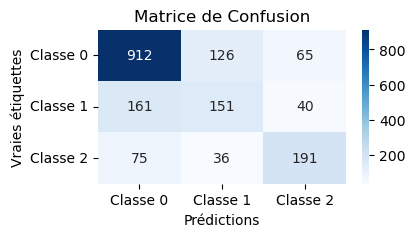

In [28]:
 import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supposons que vous ayez déjà les prédictions y_pred et les vraies étiquettes y_test
# y_pred = model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer une heatmap avec seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()


## Applying Label propagation using "knn"with Over-sampling using SMOTE

In [29]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("smote", SMOTE()),
    ("model",LabelPropagation(kernel="knn"))
])

In [30]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE()),
                ('model', LabelPropagation(kernel='knn'))])

In [31]:
y_pred = model.predict(X_test)

In [32]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.4947427663398724


In [33]:
print(accuracy_score(y_test,y_pred))

0.48947068867387594


In [34]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.34      0.50      1103
           1       0.31      0.73      0.43       352
           2       0.44      0.75      0.55       302

    accuracy                           0.49      1757
   macro avg       0.55      0.61      0.50      1757
weighted avg       0.71      0.49      0.49      1757

